# Importamos librerías

In [45]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importamos el modelo entrenado anteriormente

In [46]:
from tensorflow.keras.models import load_model
base_path = r'D:\Documentos de trabajo\Maestría\Curso Maestría Introducción a Redes Neuronales\Tarea 2\Tarea 2. Reconocimiento facial\Tareea2.-Curso-Redes-Neuronales.-Rafael-S-nchez-Cedillo\Notebooks\Segundo modelo'

#base_path='../../../Segundo modelo/'
model_name = 'path_to_my_model2.h5'
path_model = os.path.join(base_path,model_name)
pre_trained_model = load_model(path_model)
pre_trained_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 108, 32)      0         
 2D)                                                             
                                                                 
 conv2d_31 (Conv2D)          (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 41, 51, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 25, 32)      

# Eliminamos capas densas 

In [47]:
pre_trained_model.pop()
pre_trained_model.pop()
pre_trained_model.pop()
pre_trained_model.pop()
pre_trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 108, 32)      0         
 2D)                                                             
                                                                 
 conv2d_31 (Conv2D)          (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 41, 51, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 25, 32)      

# Congelamos los pesos de las capas convolucionales

In [48]:
for layer in pre_trained_model.layers:
    layer.trainable = False
pre_trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 108, 32)      0         
 2D)                                                             
                                                                 
 conv2d_31 (Conv2D)          (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 41, 51, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 25, 32)      

# Creamos nuevo modelo

In [49]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(128, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))
modelFE.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 16)                52888     
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 256)               4352      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 156,057
Trainable params: 103,169
Non-tr

# Creamos rutas de acceso a las bases de datos

In [50]:
base_dir = 'D:\Documentos de trabajo\Maestría\Curso Maestría Introducción a Redes Neuronales\Tarea 2\Tarea 2. Reconocimiento facial\Tareea2.-Curso-Redes-Neuronales.-Rafael-S-nchez-Cedillo\Data\Recognize_me'

In [51]:
train_dir = os.path.join(base_dir, 'Train/')
validation_dir = os.path.join(base_dir, 'Val/')
test_dir = os.path.join(base_dir, 'Test/')

# Procesamos las imágenes para introducirlas al modelo

En esta sección se procesan las imágenes para ser introducidas al modelo. Solo debe de correr una de las dos celdas. La primera si se requiere aumentar los datos de forma artificial y la segunda si los la base de datos se considera lo suficientemente grande y no se requiere el aumento de las imágenes.

In [52]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale= 1./255.,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
validation_datagen  = ImageDataGenerator(rotation_range=20,
                                        rescale= 1./255.,
                                        zoom_range=0.15,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.15,
                                        horizontal_flip=True,
                                        fill_mode="nearest")
test_datagen  = ImageDataGenerator(rotation_range=20,
                                   rescale= 1./255.,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest") 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(178, 218))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (178, 218))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (178, 218))

Found 498 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [27]:
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(178, 218),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True)

validation_generator =  tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(178, 218),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True)


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (178, 218))

Found 498 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Found 66 images belonging to 2 classes.


# Prombamos el modelo

In [53]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return 1e-3 * 0.9 ** epoch

In [54]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

batch_size = 5

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 50,verbose = 1, 
                                              restore_best_weights = True)

historyFE = modelFE.fit(train_generator,
                        validation_data = validation_generator,
                        callbacks=[reduce_lr, early_stop],
                        epochs = 1000)

Epoch 1/1000
100/100 [==============================] - 3s 27ms/step - loss: 0.4098 - acc: 0.8333 - val_loss: 0.3784 - val_acc: 0.8333 - lr: 1.0000e-04
Epoch 2/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.3607 - acc: 0.8333 - val_loss: 0.3426 - val_acc: 0.8333 - lr: 1.0000e-04
Epoch 3/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.3412 - acc: 0.8394 - val_loss: 0.3601 - val_acc: 0.8500 - lr: 1.0000e-04
Epoch 4/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.3282 - acc: 0.8635 - val_loss: 0.3363 - val_acc: 0.8333 - lr: 1.0000e-04
Epoch 5/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.3242 - acc: 0.8755 - val_loss: 0.3472 - val_acc: 0.8500 - lr: 1.0000e-04
Epoch 6/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.3195 - acc: 0.8655 - val_loss: 0.3609 - val_acc: 0.8500 - lr: 1.0000e-04
Epoch 7/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.3251 - ac

100/100 [==============================] - 3s 26ms/step - loss: 0.2414 - acc: 0.9177 - val_loss: 0.1677 - val_acc: 0.9333 - lr: 3.7571e-06
Epoch 55/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.2439 - acc: 0.9116 - val_loss: 0.2020 - val_acc: 0.9333 - lr: 3.3814e-06
Epoch 56/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2669 - acc: 0.8876 - val_loss: 0.2326 - val_acc: 0.9000 - lr: 3.0433e-06
Epoch 57/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.2434 - acc: 0.9036 - val_loss: 0.2362 - val_acc: 0.9000 - lr: 2.7389e-06
Epoch 58/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2790 - acc: 0.8876 - val_loss: 0.1817 - val_acc: 0.9333 - lr: 2.4650e-06
Epoch 59/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2589 - acc: 0.8976 - val_loss: 0.3168 - val_acc: 0.8667 - lr: 2.2185e-06
Epoch 60/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2306 - acc: 0.92

100/100 [==============================] - 3s 25ms/step - loss: 0.2665 - acc: 0.9076 - val_loss: 0.1841 - val_acc: 0.9500 - lr: 1.4116e-08
Epoch 108/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.2863 - acc: 0.8896 - val_loss: 0.2149 - val_acc: 0.9000 - lr: 1.2704e-08
Epoch 109/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2436 - acc: 0.9056 - val_loss: 0.2566 - val_acc: 0.9333 - lr: 1.1434e-08
Epoch 110/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.2523 - acc: 0.8956 - val_loss: 0.2530 - val_acc: 0.8667 - lr: 1.0290e-08
Epoch 111/1000
100/100 [==============================] - 2s 25ms/step - loss: 0.2445 - acc: 0.9076 - val_loss: 0.2761 - val_acc: 0.9167 - lr: 9.2614e-09
Epoch 112/1000
100/100 [==============================] - 3s 25ms/step - loss: 0.2460 - acc: 0.9016 - val_loss: 0.3004 - val_acc: 0.9000 - lr: 8.3352e-09
Epoch 113/1000
100/100 [==============================] - 2s 24ms/step - loss: 0.2193 - acc

# Vemos la evolución temporal de los loss y acc a lo largo de las épocas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

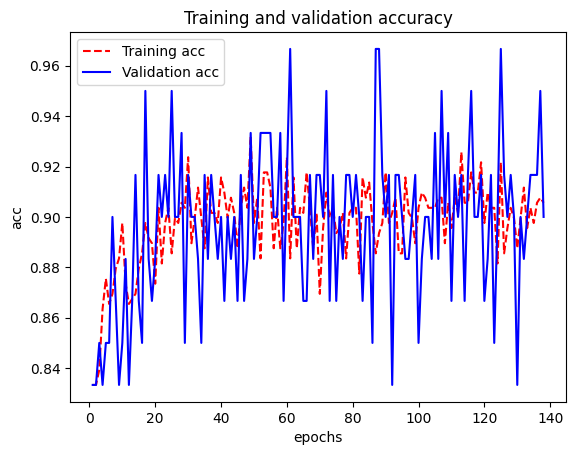

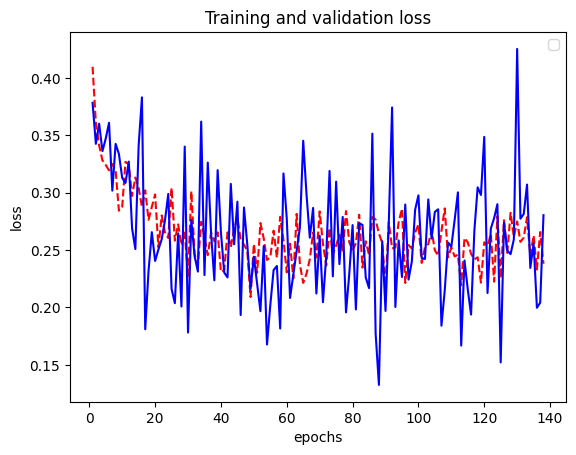

<Figure size 640x480 with 0 Axes>

In [55]:
acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()


# Utilizamos los datos de test para evaluar el modelo

In [56]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

12/12 [==============================] - 0s 20ms/step - loss: 0.2640 - acc: 0.9000
Test Accuracy: 0.8999999761581421


In [57]:
modelFE.save('FE.h5')